In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import sklearn

In [3]:
df = pd.read_json('yelp_academic_dataset_business_original.json', lines=True)

In [15]:
att = pd.json_normalize(df['attributes'].dropna())
att.columns

Index(['ByAppointmentOnly', 'BusinessAcceptsCreditCards', 'BikeParking',
       'RestaurantsPriceRange2', 'CoatCheck', 'RestaurantsTakeOut',
       'RestaurantsDelivery', 'Caters', 'WiFi', 'BusinessParking',
       'WheelchairAccessible', 'HappyHour', 'OutdoorSeating', 'HasTV',
       'RestaurantsReservations', 'DogsAllowed', 'Alcohol', 'GoodForKids',
       'RestaurantsAttire', 'Ambience', 'RestaurantsTableService',
       'RestaurantsGoodForGroups', 'DriveThru', 'NoiseLevel', 'GoodForMeal',
       'BusinessAcceptsBitcoin', 'Smoking', 'Music', 'GoodForDancing',
       'AcceptsInsurance', 'BestNights', 'BYOB', 'Corkage', 'BYOBCorkage',
       'HairSpecializesIn', 'Open24Hours', 'RestaurantsCounterService',
       'AgesAllowed', 'DietaryRestrictions'],
      dtype='object')

# Import and prepare data

In [16]:
res = pd.read_csv("yelp_restaurant_total.csv")

In [105]:
res = res.rename(columns={"cpendays_weekend" : "opendays_weekend"})

In [106]:
res

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsDelivery,opendays_work,opendays_weekend,open_workday,close_workday,open_weekend,close_weekend,categories,Service,Food
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,False,5,2,7.0,20.2,7.0,21.0,"['Restaurants', 'Food', 'BubbleTea', 'Coffee&T...",5,True
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,True,5,2,5.4,13.2,8.5,22.0,"['Burgers', 'FastFood', 'Sandwiches', 'Food', ...",6,True
2,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,...,True,5,2,4.8,14.8,6.0,19.0,"['IceCream&FrozenYogurt', 'FastFood', 'Burgers...",5,True
3,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,...,False,5,2,11.0,14.0,10.0,14.0,"['Vietnamese', 'Food', 'Restaurants', 'FoodTru...",4,True
4,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,...,True,5,2,6.0,22.0,6.0,22.0,"['American(Traditional)', 'Restaurants', 'Dine...",4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34982,w_4xUt-1AyY2ZwKtnjW0Xg,Bittercreek Alehouse,246 N 8th St,Boise,ID,83702,43.616590,-116.202383,4.5,998,...,False,5,2,8.8,18.0,11.0,22.5,"['Bars', 'Gastropubs', 'Sandwiches', 'Nightlif...",5,True
34983,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,3.0,11,...,True,5,2,0.0,0.0,0.0,0.0,"['Restaurants', 'Sandwiches', 'ConvenienceStor...",5,True
34984,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,...,False,5,2,0.0,3.4,0.0,0.0,"['Cafes', 'JuiceBars&Smoothies', 'Coffee&Tea',...",5,True
34985,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,...,True,4,2,11.0,17.0,11.0,12.0,"['Restaurants', 'Mexican']",2,True


In [107]:
res.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'RestaurantsDelivery',
       'opendays_work', 'opendays_weekend', 'open_workday', 'close_workday',
       'open_weekend', 'close_weekend', 'categories', 'Service', 'Food'],
      dtype='object')

In [78]:
# clean invalid data
res.loc[res.state == "XMS",:].index.tolist()
res = res.drop(labels=22965)
res.state.unique()

array(['PA', 'TN', 'FL', 'IN', 'NV', 'IL', 'NJ', 'CA', 'LA', 'DE', 'MO',
       'AZ', 'ID', 'AB', 'HI'], dtype=object)

In [ ]:
# convert columns to categorical

In [89]:
res.state = res.state.astype('category')
res.RestaurantsDelivery =res.RestaurantsDelivery.astype('category')
#res.RestaurantsPriceRange2 = res.RestaurantsPriceRange2.astype('category')
res.RestaurantsTakeOut = res.RestaurantsTakeOut.astype('category')


In [157]:
# add categorical columns
res['Cstars'] = res.stars.astype('category')

In [158]:
res

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,opendays_work,opendays_weekend,open_workday,close_workday,open_weekend,close_weekend,categories,Service,Food,Cstars
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,5,2,7.0,20.2,7.0,21.0,"['Restaurants', 'Food', 'BubbleTea', 'Coffee&T...",5,True,4.0
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,5,2,5.4,13.2,8.5,22.0,"['Burgers', 'FastFood', 'Sandwiches', 'Food', ...",6,True,2.0
2,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,...,5,2,4.8,14.8,6.0,19.0,"['IceCream&FrozenYogurt', 'FastFood', 'Burgers...",5,True,1.5
3,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,...,5,2,11.0,14.0,10.0,14.0,"['Vietnamese', 'Food', 'Restaurants', 'FoodTru...",4,True,4.0
4,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,...,5,2,6.0,22.0,6.0,22.0,"['American(Traditional)', 'Restaurants', 'Dine...",4,True,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34982,w_4xUt-1AyY2ZwKtnjW0Xg,Bittercreek Alehouse,246 N 8th St,Boise,ID,83702,43.616590,-116.202383,4.5,998,...,5,2,8.8,18.0,11.0,22.5,"['Bars', 'Gastropubs', 'Sandwiches', 'Nightlif...",5,True,4.5
34983,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,3.0,11,...,5,2,0.0,0.0,0.0,0.0,"['Restaurants', 'Sandwiches', 'ConvenienceStor...",5,True,3.0
34984,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,...,5,2,0.0,3.4,0.0,0.0,"['Cafes', 'JuiceBars&Smoothies', 'Coffee&Tea',...",5,True,4.0
34985,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,...,4,2,11.0,17.0,11.0,12.0,"['Restaurants', 'Mexican']",2,True,4.5


# Linear Reg.

## statsmodels

In [159]:
from statsmodels.formula.api import ols

In [165]:
model = ols('stars ~ state+review_count+RestaurantsDelivery+RestaurantsPriceRange2+\
            RestaurantsTakeOut+opendays_work+opendays_weekend+open_workday+open_weekend+Service', data=res)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     301.8
Date:                Sun, 27 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:52:54   Log-Likelihood:                -41306.
No. Observations:               34986   AIC:                         8.266e+04
Df Residuals:                   34962   BIC:                         8.286e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.8211      0.048     79.944      0.000       3.727       3.915
state[T.AZ]                    -0.0231      0.027     -0.866      0.387      -0.075       0.029
state[T.CA]                     0.1928      0.036      5.329      0.000       0.122       0.264
state[T.DE]                    -0.0606      0.035     -1.720      0.086      -0.130       0.008
state[T.FL]                     0.0377      0.022      1.738      0.082      -0.005       0.080
state[T.HI]                    -0.3025      0.789     -0.383      0.701      -1.848       1.244
state[T.ID]                    -0.0215      0.032     -0.671      0.502      -0.084       0.041
state[T.IL]                    -0.2082      0.035     -5.957      0.000      -0.277      -0.140
state[T.IN]                    -0.0513      0.024     -2.122      0.034      -0.099      -0.004
state[T.LA]                    -0.0819      0.025     -3.243      0.001      -0.131      -0.032
state[T.MO]                    -0.1292      0.024     -5.308      0.000      -0.177      -0.081
state[T.NJ]                     0.0438      0.025      1.757      0.079      -0.005       0.093
state[T.NV]                    -0.0538      0.031     -1.746      0.081      -0.114       0.007
state[T.PA]                     0.0298      0.021      1.421      0.155      -0.011       0.071
state[T.TN]                    -0.0965      0.024     -4.038      0.000      -0.143      -0.050
RestaurantsDelivery[T.True]    -0.3548      0.009    -37.381      0.000      -0.373      -0.336
RestaurantsTakeOut[T.True]      0.1749      0.014     12.798      0.000       0.148       0.202
review_count                    0.0006   2.07e-05     29.495      0.000       0.001       0.001
RestaurantsPriceRange2         -0.0767      0.006    -13.250      0.000      -0.088      -0.065
opendays_work                  -0.0434      0.006     -7.625      0.000      -0.055      -0.032
opendays_weekend               -0.3546      0.013    -27.153      0.000      -0.380      -0.329
open_workday                    0.0718      0.002     44.530      0.000       0.069       0.075
open_weekend                   -0.0161      0.002     -9.156      0.000      -0.019      -0.013
Service                         0.0356      0.002     19.030      0.000       0.032       0.039
==============================================================================
Omnibus:                     1082.173   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1180.624
Skew:                          -0.447   Prob(JB):                    4.27e-257
Kurtosis:                       2.895   Cond. No.                     4.57e+04
==============================================================================

Notes:
[1] Stand

In [167]:
#fitted_model.summary().as_csv()

'                      OLS Regression Results                      \nDep. Variable:   ,stars           ,  R-squared:         ,   0.166 \nModel:           ,OLS             ,  Adj. R-squared:    ,   0.165 \nMethod:          ,Least Squares   ,  F-statistic:       ,   301.8 \nDate:            ,Sun, 27 Mar 2022,  Prob (F-statistic):,  0.00   \nTime:            ,20:53:33        ,  Log-Likelihood:    , -41306. \nNo. Observations:, 34986          ,  AIC:               ,8.266e+04\nDf Residuals:    , 34962          ,  BIC:               ,8.286e+04\nDf Model:        ,    23          ,                     ,         \nCovariance Type: ,nonrobust       ,                     ,         \n                           ,   coef   , std err ,    t    ,P>|t| ,  [0.025 ,  0.975] \nIntercept                  ,    3.8211,    0.048,   79.944, 0.000,    3.727,    3.915\nstate[T.AZ]                ,   -0.0231,    0.027,   -0.866, 0.387,   -0.075,    0.029\nstate[T.CA]                ,    0.1928,    0.036,    5.329

In [ ]:
#Box-Cox

In [168]:
from scipy import stats

In [171]:
Bstars,Blambda =  stats.boxcox(res.stars)

In [172]:
res['Bstars'] = Bstars

In [175]:
res['Bstars']

0        6.632893
1        1.422063
2        0.607158
3        6.632893
4        2.437171
           ...   
34982    8.402421
34983    3.646858
34984    6.632893
34985    8.402421
34986    8.402421
Name: Bstars, Length: 34986, dtype: float64

In [174]:
model2 = ols('Bstars ~ state+review_count+RestaurantsDelivery+RestaurantsPriceRange2+\
            RestaurantsTakeOut+opendays_work+opendays_weekend+open_workday+open_weekend+Service', data=res)
fitted_model2 = model2.fit()
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Bstars   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     294.4
Date:                Sun, 27 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:03:45   Log-Likelihood:                -77607.
No. Observations:               34986   AIC:                         1.553e+05
Df Residuals:                   34962   BIC:                         1.555e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       6.6893      0.135     49.587      0.000       6.425       6.954
state[T.AZ]                    -0.0803      0.075     -1.066      0.286      -0.228       0.067
state[T.CA]                     0.5965      0.102      5.842      0.000       0.396       0.797
state[T.DE]                    -0.1736      0.100     -1.744      0.081      -0.369       0.021
state[T.FL]                     0.1399      0.061      2.284      0.022       0.020       0.260
state[T.HI]                    -1.2767      2.226     -0.573      0.566      -5.640       3.087
state[T.ID]                    -0.0576      0.090     -0.637      0.524      -0.235       0.120
state[T.IL]                    -0.5221      0.099     -5.292      0.000      -0.716      -0.329
state[T.IN]                    -0.0903      0.068     -1.325      0.185      -0.224       0.043
state[T.LA]                    -0.1631      0.071     -2.287      0.022      -0.303      -0.023
state[T.MO]                    -0.3020      0.069     -4.396      0.000      -0.437      -0.167
state[T.NJ]                     0.1160      0.070      1.650      0.099      -0.022       0.254
state[T.NV]                    -0.1097      0.087     -1.263      0.207      -0.280       0.061
state[T.PA]                     0.0918      0.059      1.549      0.122      -0.024       0.208
state[T.TN]                    -0.2080      0.067     -3.083      0.002      -0.340      -0.076
RestaurantsDelivery[T.True]    -0.9605      0.027    -35.854      0.000      -1.013      -0.908
RestaurantsTakeOut[T.True]      0.4041      0.039     10.475      0.000       0.328       0.480
review_count                    0.0017   5.83e-05     29.349      0.000       0.002       0.002
RestaurantsPriceRange2         -0.2947      0.016    -18.038      0.000      -0.327      -0.263
opendays_work                  -0.1395      0.016     -8.691      0.000      -0.171      -0.108
opendays_weekend               -1.0860      0.037    -29.464      0.000      -1.158      -1.014
open_workday                    0.2073      0.005     45.557      0.000       0.198       0.216
open_weekend                   -0.0597      0.005    -12.063      0.000      -0.069      -0.050
Service                         0.1038      0.005     19.637      0.000       0.093       0.114
==============================================================================
Omnibus:                      517.484   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.737
Skew:                          -0.028   Prob(JB):                     1.11e-66
Kurtosis:                       2.547   Cond. No.                     4.57e+04
==============================================================================

Notes:
[1] Stand

## sklearn (Results are the same)

In [30]:
from sklearn.linear_model import LinearRegression

In [143]:
lr=LinearRegression()

In [108]:
X=res[["state", "review_count", "RestaurantsDelivery", "RestaurantsPriceRange2", 'RestaurantsTakeOut',
      'opendays_work','opendays_weekend', 'open_workday', 'open_weekend','Service']]

In [109]:
X

,state,review_count,RestaurantsDelivery,RestaurantsPriceRange2,RestaurantsTakeOut,opendays_work,opendays_weekend,open_workday,open_weekend,Service
0,PA,80,False,1,True,5,2,7.0,7.0,5
1,TN,6,True,1,True,5,2,5.4,8.5,6
2,TN,10,True,1,True,5,2,4.8,6.0,5
3,FL,10,False,0,False,5,2,11.0,10.0,4
4,IN,28,True,1,True,5,2,6.0,6.0,4
...,...,...,...,...,...,...,...,...,...,...
34982,ID,998,False,2,False,5,2,8.8,11.0,5
34983,PA,11,True,1,True,5,2,0.0,0.0,5
34984,ID,33,False,1,False,5,2,0.0,0.0,5
34985,PA,35,True,2,True,4,2,11.0,11.0,2


**X_new: one-hot**

In [189]:
X_new = pd.get_dummies(X)

In [190]:
X_new = X_new.drop(columns=['RestaurantsDelivery_False', 'RestaurantsTakeOut_False'])

In [125]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [128]:
#X_new = normalize(X_new)

In [191]:
X_new

,review_count,RestaurantsPriceRange2,opendays_work,opendays_weekend,open_workday,open_weekend,Service,state_AB,state_AZ,state_CA,...,state_IL,state_IN,state_LA,state_MO,state_NJ,state_NV,state_PA,state_TN,RestaurantsDelivery_True,RestaurantsTakeOut_True
0,80,1,5,2,7.0,7.0,5,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,6,1,5,2,5.4,8.5,6,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,10,1,5,2,4.8,6.0,5,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,10,0,5,2,11.0,10.0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,1,5,2,6.0,6.0,4,0,0,0,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34982,998,2,5,2,8.8,11.0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34983,11,1,5,2,0.0,0.0,5,0,0,0,...,0,0,0,0,0,0,1,0,1,1
34984,33,1,5,2,0.0,0.0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34985,35,2,4,2,11.0,11.0,2,0,0,0,...,0,0,0,0,0,0,1,0,1,1


In [100]:
y = res.stars

In [148]:
lr.fit(X=X_new, y=y)

LinearRegression()

In [149]:
lr.coef_

array([ 0.00060912, -0.07670576, -0.043367  , -0.35460952,  0.07180753,
       -0.01605763,  0.03564059,  0.04829937,  0.0252047 ,  0.24106597,
       -0.01232302,  0.08600639, -0.25416009,  0.02679858, -0.15992636,
       -0.00295494, -0.03363791, -0.08089788,  0.09205905, -0.00545611,
        0.07814627, -0.04822404, -0.3548004 ,  0.1749321 ])

In [150]:
lr.score(X_new,y)

0.1656367353203071

# Desicion tree

**after one-hot coding, normalize to X_new2**

In [192]:
X_new2 = normalize(X_new)

In [193]:
X_new2

,review_count,RestaurantsPriceRange2,opendays_work,opendays_weekend,open_workday,open_weekend,Service,state_AB,state_AZ,state_CA,...,state_IL,state_IN,state_LA,state_MO,state_NJ,state_NV,state_PA,state_TN,RestaurantsDelivery_True,RestaurantsTakeOut_True
0,0.009917,0.25,1.0,1.0,0.304348,0.291667,0.114286,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.000132,0.25,1.0,1.0,0.234783,0.354167,0.142857,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.000661,0.25,1.0,1.0,0.208696,0.250000,0.114286,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.000661,0.00,1.0,1.0,0.478261,0.416667,0.085714,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.003041,0.25,1.0,1.0,0.260870,0.250000,0.085714,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34982,0.131297,0.50,1.0,1.0,0.382609,0.458333,0.114286,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34983,0.000793,0.25,1.0,1.0,0.000000,0.000000,0.114286,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
34984,0.003702,0.25,1.0,1.0,0.000000,0.000000,0.114286,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34985,0.003967,0.50,0.8,1.0,0.478261,0.458333,0.028571,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [178]:
def my_plot_decision_regions(X,y,model,figsize=(8,8)):
    '''Plot classifier decision regions, classification predictions and training data'''
    fig,ax = plt.subplots(1,1,figsize=figsize)
    # use mlxtend plot_decision_regions
    plot_decision_regions(X.values,y.values,model)
    ax.set_xlabel(X.columns[0]); ax.set_ylabel(X.columns[1]);

In [188]:
def my_plot_regression(X,y,model,label='yhat',figsize=(8,8)):
    '''Plot regression predictions and training data'''
    # generate test data and make predictions
    X_test = np.linspace(X.iloc[:,0].min(),X.iloc[:,0].max(),1000).reshape(-1,1)
    y_hat = model.predict(X_test)
    # plot
    fig,ax = plt.subplots(1,1,figsize=figsize)
    ax.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
    ax.plot(X_test, y_hat, color="cornflowerblue", label=label, linewidth=2)
    ax.set_xlabel(X.columns[0]); ax.set_ylabel(y.name); ax.legend();

## DecisionTreeClassifier

In [179]:
from sklearn.tree import DecisionTreeClassifier


In [184]:
y_c = res.Cstars

In [186]:
y_c.value_counts().sort_index()

1.0     189
1.5    1194
2.0    2160
2.5    3154
3.0    4569
3.5    7330
4.0    9182
4.5    6057
5.0    1151
Name: stars, dtype: int64

In [185]:
dtc = DecisionTreeClassifier(max_depth=10) # max_depth: max number of questions
dtc.fit(X_new2,y_c)

my_plot_decision_regions(X_new2,y_c,dtc)

ValueError: Unknown label type: 'continuous'

In [ ]:
from sklearn.tree import plot_tree
fig,ax = plt.subplots(1,1,figsize=(24,12))
plot_tree(dtc_md3,ax=ax,fontsize=18,feature_names=X.columns,filled=True);

## DecisionTreeRegressor

In [211]:
from sklearn import tree

In [187]:
from sklearn.tree import DecisionTreeRegressor

### Without Train/Test split to test, can jump to the next section

In [228]:
dtr = DecisionTreeRegressor(max_depth=10)
dtr.fit(X_new2,y)

DecisionTreeRegressor(max_depth=10)

In [209]:
?DecisionTreeRegressor

In [226]:
np.array(X_new2.columns)

array(['review_count', 'RestaurantsPriceRange2', 'opendays_work',
       'opendays_weekend', 'open_workday', 'open_weekend', 'Service',
       'state_AB', 'state_AZ', 'state_CA', 'state_DE', 'state_FL',
       'state_HI', 'state_ID', 'state_IL', 'state_IN', 'state_LA',
       'state_MO', 'state_NJ', 'state_NV', 'state_PA', 'state_TN',
       'RestaurantsDelivery_True', 'RestaurantsTakeOut_True'],
      dtype=object)

In [229]:
dtr.feature_importances_

array([0.22542656, 0.20415724, 0.06260279, 0.09142894, 0.03960178,
       0.13400485, 0.05167262, 0.00352975, 0.0028805 , 0.00143404,
       0.00103422, 0.00198293, 0.        , 0.00089574, 0.00152356,
       0.00419243, 0.00403748, 0.00362675, 0.00392912, 0.00547996,
       0.00465659, 0.00568742, 0.13186264, 0.01435209])

In [242]:
# importance
imp = pd.concat([pd.DataFrame(np.array(X_new2.columns), columns=["factors"]), pd.DataFrame(dtr.feature_importances_, columns=["importance"])], axis=1)

In [252]:
imp_new = imp.sort_values(by=['importance'], ascending=False).reset_index().drop(columns=["index"])

In [253]:
imp_new

,factors,importance
0,review_count,0.225427
1,RestaurantsPriceRange2,0.204157
2,open_weekend,0.134005
3,RestaurantsDelivery_True,0.131863
4,opendays_weekend,0.091429
5,opendays_work,0.062603
6,Service,0.051673
7,open_workday,0.039602
8,RestaurantsTakeOut_True,0.014352
9,state_TN,0.005687


In [212]:

text_representation = tree.export_text(dtr)
print(text_representation)

|--- feature_0 <= 48.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_6 <= 3.50
|   |   |   |--- feature_4 <= 10.30
|   |   |   |   |--- feature_0 <= 18.50
|   |   |   |   |   |--- feature_22 <= 0.50
|   |   |   |   |   |   |--- feature_5 <= 9.75
|   |   |   |   |   |   |   |--- feature_5 <= 6.50
|   |   |   |   |   |   |   |   |--- feature_23 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- value: [4.67]
|   |   |   |   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |   |   |   |--- value: [3.50]
|   |   |   |   |   |   |   |   |--- feature_23 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 8.00
|   |   |   |   |   |   |   |   |   |   |--- value: [3.00]
|   |   |   |   |   |   |   |   |   |--- feature_0 >  8.00
|   |   |   |   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |   |   |--- feature_5 >  6.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 10.50
|   |   |

In [216]:
?tree.export_text

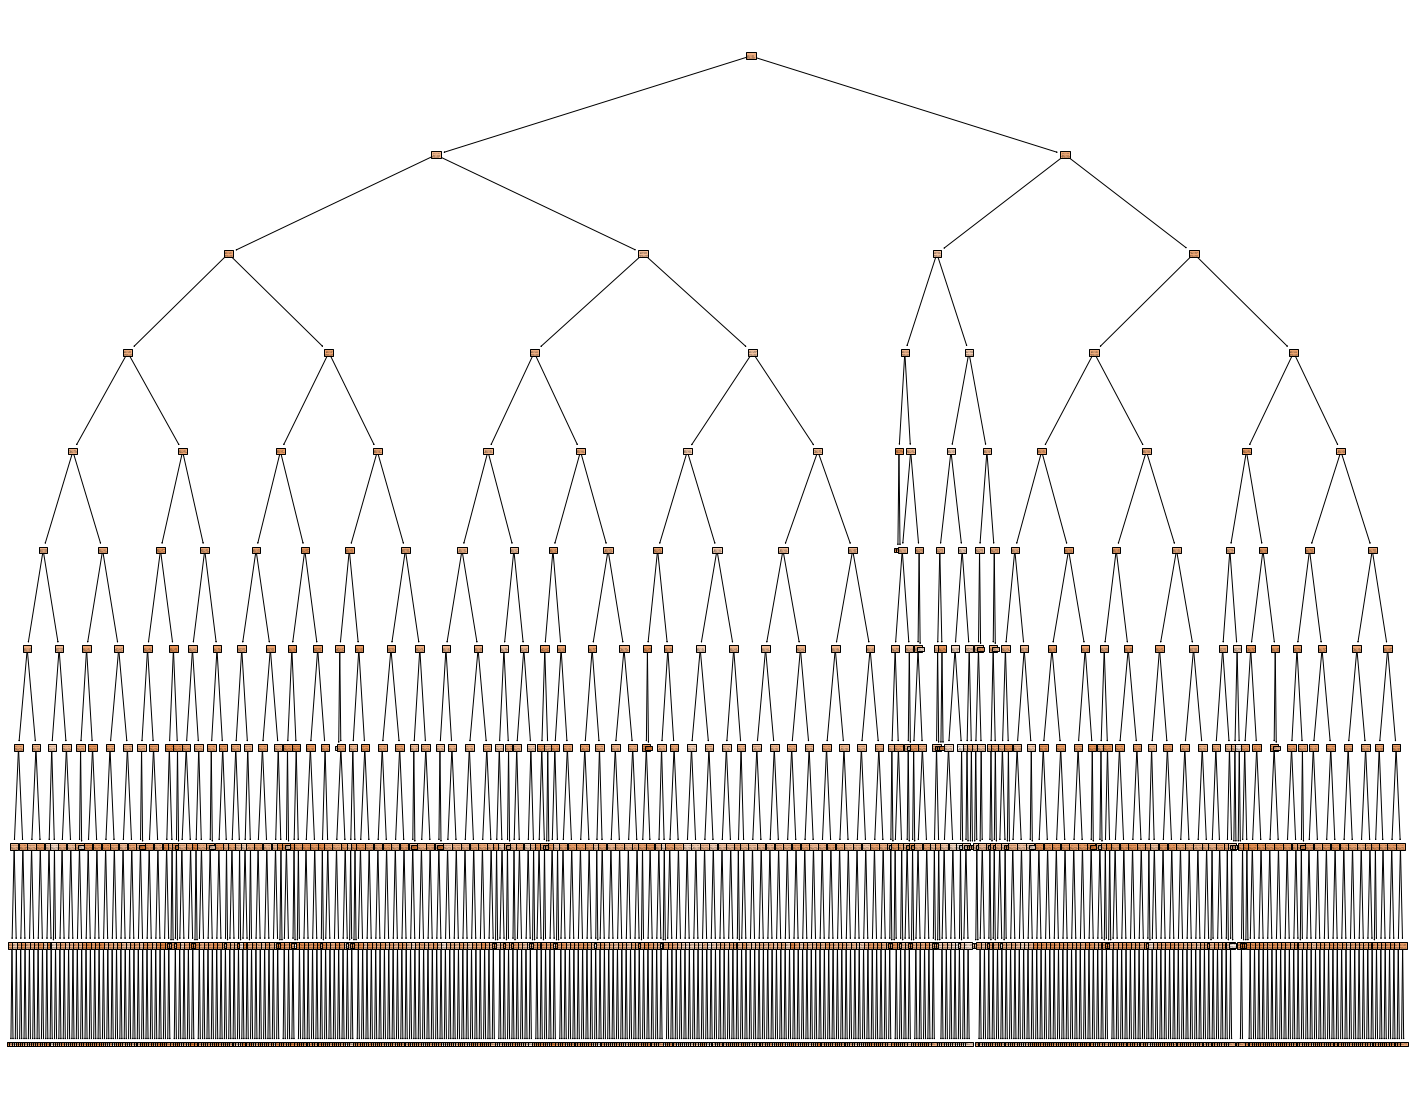

In [215]:
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(dtr, 
                   #feature_names=,  
                   #class_names=,
                   filled=True)

In [255]:
from sklearn.model_selection import train_test_split

### Apply Train/Test split to test

In [258]:
X_train,X_test,y_train,y_test = train_test_split(X_new2,
                                                         y,
                                                         train_size=.8,  #default (only need one of train/test)
                                                         test_size=.2,   #default
                                                         random_state=123)

In [ ]:
# find bext depth

In [273]:
score_store = np.array(' ')
for dep in range(3,20):
    dtr0 = DecisionTreeRegressor(max_depth=dep)
    dtr0.fit(X_train,y_train)
    score_store = np.append(score_store,dtr0.score(X_test,y_test))
score_store

array([' ', '0.19550190880307672', '0.23167128410865967',
       '0.2733742531379171', '0.29566172153406756', '0.31304034897704425',
       '0.31787123479620794', '0.310356608633536', '0.2933565674144176',
       '0.27807436139709474', '0.2534054057690711', '0.21991412749904526',
       '0.1882697387676331', '0.1547297229527831', '0.12297656198562912',
       '0.07536492238025849', '0.04417814740378745',
       '0.02715607269832887'], dtype='<U32')

In [265]:
# max when dep = 8

Object `append` not found.


In [274]:
dtr3 = DecisionTreeRegressor(max_depth=8)
dtr3.fit(X_new2,y)

DecisionTreeRegressor(max_depth=8)

In [275]:
# importance
imp = pd.concat([pd.DataFrame(np.array(X_new2.columns), columns=["factors"]), pd.DataFrame(dtr3.feature_importances_, columns=["importance"])], axis=1)

In [276]:
imp_new = imp.sort_values(by=['importance'], ascending=False).reset_index().drop(columns=["index"])

In [277]:
imp_new

,factors,importance
0,RestaurantsPriceRange2,0.229502
1,review_count,0.226282
2,RestaurantsDelivery_True,0.150036
3,open_weekend,0.131448
4,opendays_weekend,0.101260
5,opendays_work,0.063140
6,Service,0.043887
7,open_workday,0.031025
8,RestaurantsTakeOut_True,0.005650
9,state_IN,0.002842


In [283]:

text_representation = tree.export_text(dtr, feature_names=list(X_new2.columns))
print(text_representation)

|--- review_count <= 0.01
|   |--- RestaurantsPriceRange2 <= 0.12
|   |   |--- Service <= 0.07
|   |   |   |--- open_workday <= 0.45
|   |   |   |   |--- review_count <= 0.00
|   |   |   |   |   |--- RestaurantsDelivery_True <= 0.50
|   |   |   |   |   |   |--- open_weekend <= 0.41
|   |   |   |   |   |   |   |--- open_weekend <= 0.27
|   |   |   |   |   |   |   |   |--- RestaurantsTakeOut_True <= 0.50
|   |   |   |   |   |   |   |   |   |--- opendays_weekend <= 0.75
|   |   |   |   |   |   |   |   |   |   |--- value: [4.67]
|   |   |   |   |   |   |   |   |   |--- opendays_weekend >  0.75
|   |   |   |   |   |   |   |   |   |   |--- value: [3.50]
|   |   |   |   |   |   |   |   |--- RestaurantsTakeOut_True >  0.50
|   |   |   |   |   |   |   |   |   |--- review_count <= 0.00
|   |   |   |   |   |   |   |   |   |   |--- value: [3.00]
|   |   |   |   |   |   |   |   |   |--- review_count >  0.00
|   |   |   |   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |   |   |--- 

### Use Depth = 3 to visualize

In [ ]:
# Dep = 3

In [284]:
dtr4 = DecisionTreeRegressor(max_depth=3)
dtr4.fit(X_new2,y)

DecisionTreeRegressor(max_depth=3)

In [285]:
# importance
imp = pd.concat([pd.DataFrame(np.array(X_new2.columns), columns=["factors"]), pd.DataFrame(dtr4.feature_importances_, columns=["importance"])], axis=1)

In [286]:
imp_new = imp.sort_values(by=['importance'], ascending=False).reset_index().drop(columns=["index"])

In [287]:
imp_new

,factors,importance
0,review_count,0.356955
1,RestaurantsPriceRange2,0.323639
2,RestaurantsDelivery_True,0.248967
3,open_weekend,0.052719
4,Service,0.017721
5,state_IL,0.000000
6,state_TN,0.000000
7,state_PA,0.000000
8,state_NV,0.000000
9,state_NJ,0.000000


In [289]:
text_representation = tree.export_text(dtr4, feature_names=list(X_new2.columns))
print(text_representation)

|--- review_count <= 0.01
|   |--- RestaurantsPriceRange2 <= 0.12
|   |   |--- Service <= 0.07
|   |   |   |--- value: [3.62]
|   |   |--- Service >  0.07
|   |   |   |--- value: [3.89]
|   |--- RestaurantsPriceRange2 >  0.12
|   |   |--- RestaurantsDelivery_True <= 0.50
|   |   |   |--- value: [3.56]
|   |   |--- RestaurantsDelivery_True >  0.50
|   |   |   |--- value: [2.94]
|--- review_count >  0.01
|   |--- open_weekend <= 0.18
|   |   |--- RestaurantsDelivery_True <= 0.50
|   |   |   |--- value: [3.31]
|   |   |--- RestaurantsDelivery_True >  0.50
|   |   |   |--- value: [2.59]
|   |--- open_weekend >  0.18
|   |   |--- review_count <= 0.02
|   |   |   |--- value: [3.68]
|   |   |--- review_count >  0.02
|   |   |   |--- value: [3.90]



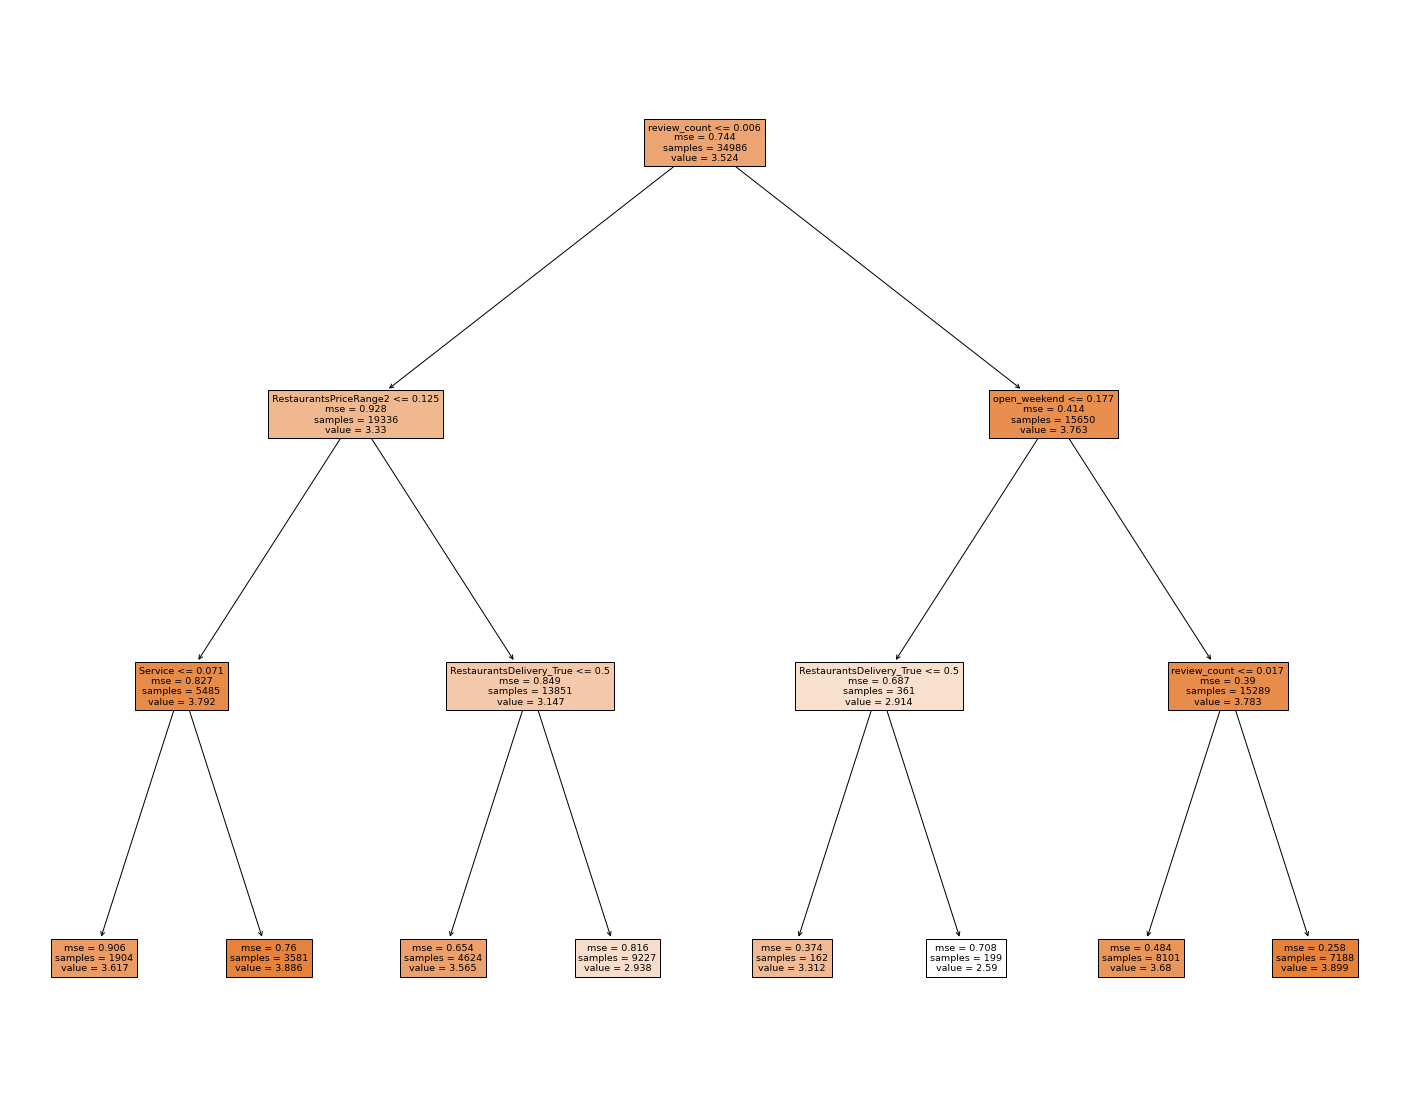

In [290]:
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(dtr4, 
                   feature_names=list(X_new2.columns),  
                   #class_names=,
                   filled=True)

In [282]:
?tree.export_text